### Math Final Project - Group 3

#### Members:
<ul>
    <li>Narjes Amousoltani F.</li>
    <li>Aanandita Madan Chavan</li>
    <li>Jorge Luis Galarraga Prince</li>
    <li>Mark Kale, Abdullah Malik</li>
    <li>Shreeya Shah</li>
    <li>Sirjana Shrestha</li>
    <li>Dushyant Tyagi</li>
</ul>

##### Dataset link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

# Preprocessing section

Importing all the libraries and methods

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [242]:
df = pd.read_csv('Hotel_Reservations.csv')

In [243]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Encoding categorical data

### Encoding the Independent Variable

In [245]:
le = LabelEncoder()
y_encoded = df.iloc[:, -1].values
y_encoded = le.fit_transform(y_encoded)
y_encoded

array([1, 1, 0, ..., 1, 0, 1])

---
# Exploratory Data Analysis 

In [246]:
df.shape

(36275, 19)

##### Observation: We have too many features and few samples, taking into account the number of features.

In [247]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [248]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [249]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

---
# Insights

In [250]:
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

**67.23% of the booking are not cancelled and 32.76 % of booking are cancelled**

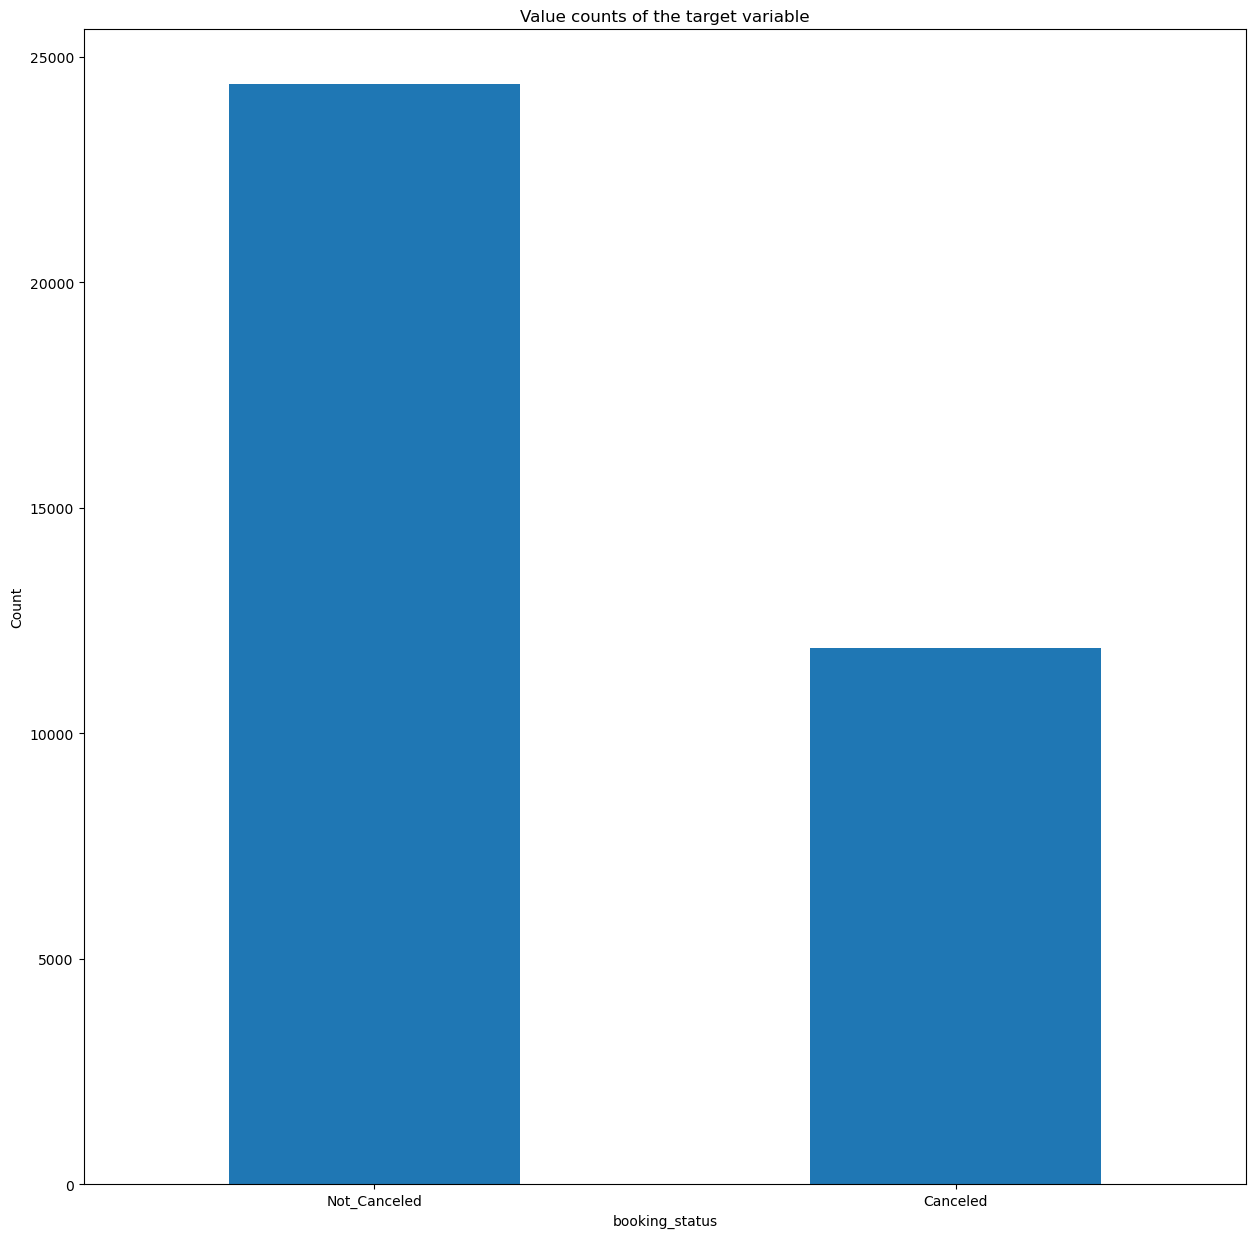

In [251]:
df.booking_status.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("booking_status")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

**Visualization of booking status**

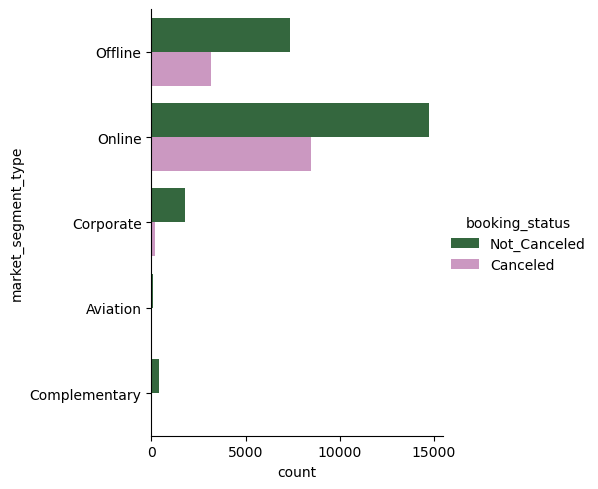

In [252]:
# Booking Status based on Market segmentation
sns.catplot(y="market_segment_type", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Online booking are canceled more than offline, followed by corporate market segment

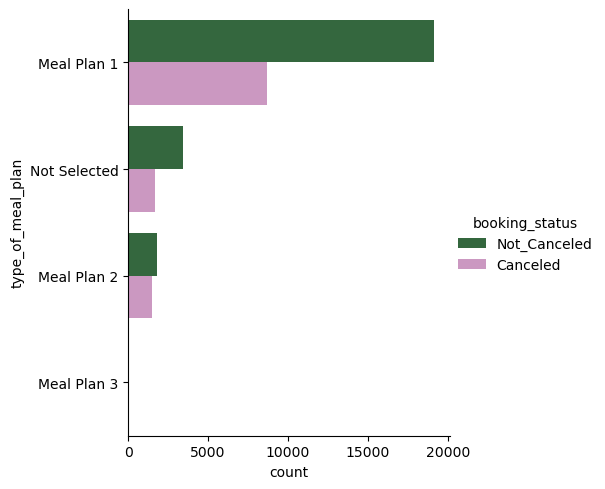

In [253]:
sns.catplot(y="type_of_meal_plan", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Meal Plan 1 is the most popular type of meal_plan

<AxesSubplot: xlabel='room_type_reserved', ylabel='avg_price_per_room'>

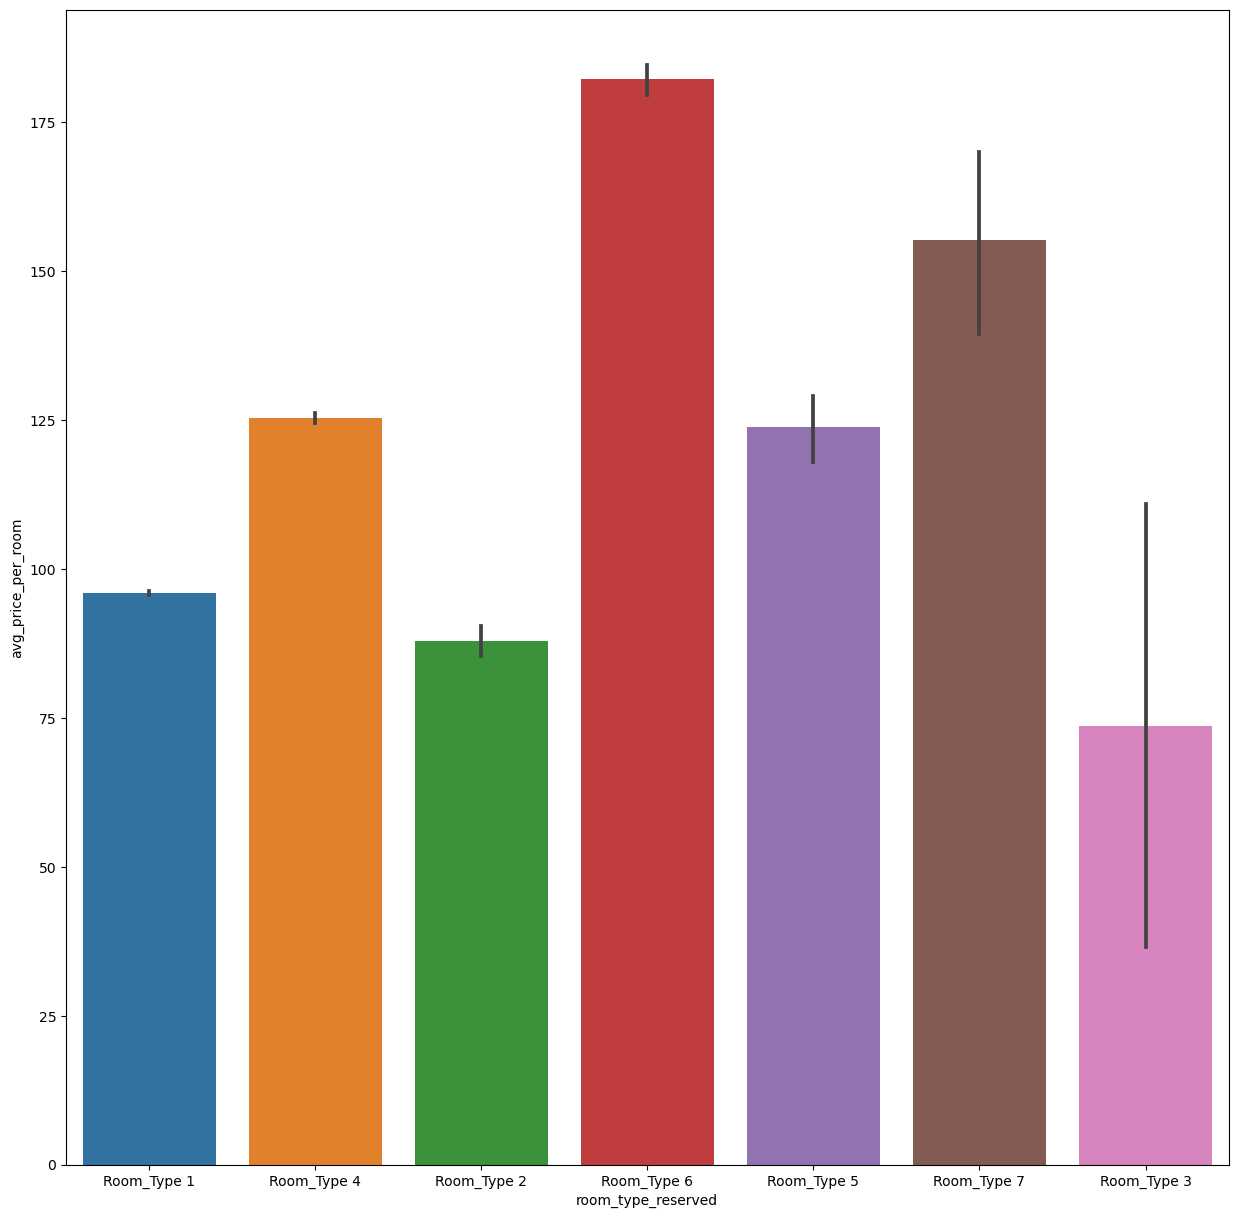

In [254]:
# Average Price per room based on room type reserved
sns.barplot(data=df, x="room_type_reserved", y="avg_price_per_room")

### Encoding market_segment_type'

In [255]:
df['market_segment_type'] = LabelEncoder().fit_transform(df['market_segment_type'])

Observations:
The items below were dropped from the dataset, since they didn't increase the accuracy of the model, moreover, they were categorical items.

room_type_reserved
type_of_meal_plan
Booking_ID

In [256]:
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan'], axis=1, inplace=True) no parameters accuracy score 0.7754295690526509 and 0.7583386933749885 with huber
# df.drop(['Booking_ID', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.67 and 0.7746025911972801 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True) no parameters accuracy score 0.7665165855003216 and 0.771110906919048 with huber
# df.drop(['Booking_ID'], axis=1, inplace=True)
# df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True) no parameters accuracy score 0.7723973169162914 and 0.7655058347882018 with huber
df.drop(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved'], axis=1, inplace=True)

---
# SGD Section

### Training the model 

In [257]:
X = df.drop(['booking_status'], axis=1)
num_feats = df.shape[1]-1

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.30, random_state=1)

## Stochastic Gradient Descent for Classification- if booking status is cancelled or not

In [260]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score,f1_score

In [261]:
SGD_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [262]:
SGD_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [263]:
SGD_predictions = SGD_model.predict(X_test)

In [264]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,SGD_predictions))

[[1675 1847]
 [ 625 6736]]


In [265]:
accuracy_score(y_test, SGD_predictions)

0.7728567490581641

In [266]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8411

In [267]:
recall_score(y_test, SGD_predictions)

0.9150930580084228

In [268]:
precision_score(y_test, SGD_predictions)

0.7848071769777467

In [269]:
f1_score(y_test, SGD_predictions)

0.8449573507275464

### Scale the dataset

In [270]:
from sklearn.preprocessing import MinMaxScaler   # Transforms features by scaling each feature to a given range

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # 

In [271]:
SGD_model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
SGD_predictions = SGD_model.predict(X_test)

In [272]:
print(confusion_matrix(y_test,SGD_predictions))

[[2684  838]
 [1594 5767]]


In [273]:
accuracy_score(y_test, SGD_predictions)

0.7765322061931452

In [274]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8451

In [275]:
recall_score(y_test, SGD_predictions)

0.7834533351446814

In [276]:
precision_score(y_test, SGD_predictions)

0.8731264193792582

In [277]:
f1_score(y_test, SGD_predictions)

0.825862809680653

---
### Use of GridSearchCV

In [278]:
from sklearn.model_selection import GridSearchCV

In [279]:
param_grid = {'loss':[ 'hinge', 'log_loss', 'modified_huber'], 
              'alpha': [0.0001, 0.001, 0.01, 0.1]}

In [280]:
SGD_model = SGDClassifier()

In [281]:
grid = GridSearchCV(SGD_model, param_grid)

In [282]:
#%time
grid.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log_loss', 'modified_huber']})

In [283]:
grid.best_estimator_

SGDClassifier(alpha=0.001, loss='modified_huber')

In [284]:
model = grid.best_estimator_
model

SGDClassifier(alpha=0.001, loss='modified_huber')

In [285]:
grid.best_params_

{'alpha': 0.001, 'loss': 'modified_huber'}

In [286]:
yfit = model.predict(X_test)

In [287]:
confusion_matrix(y_test, yfit)

array([[2571,  951],
       [1390, 5971]], dtype=int64)

In [288]:
accuracy_score(y_test, yfit)

0.7848938711752275

In [289]:
recall_score(y_test, yfit)

0.8111669610107323

In [290]:
precision_score(y_test, yfit)

0.8626119618607339

In [291]:
f1_score(y_test, yfit)

0.8360988587831688

### Feature Selection

<AxesSubplot: >

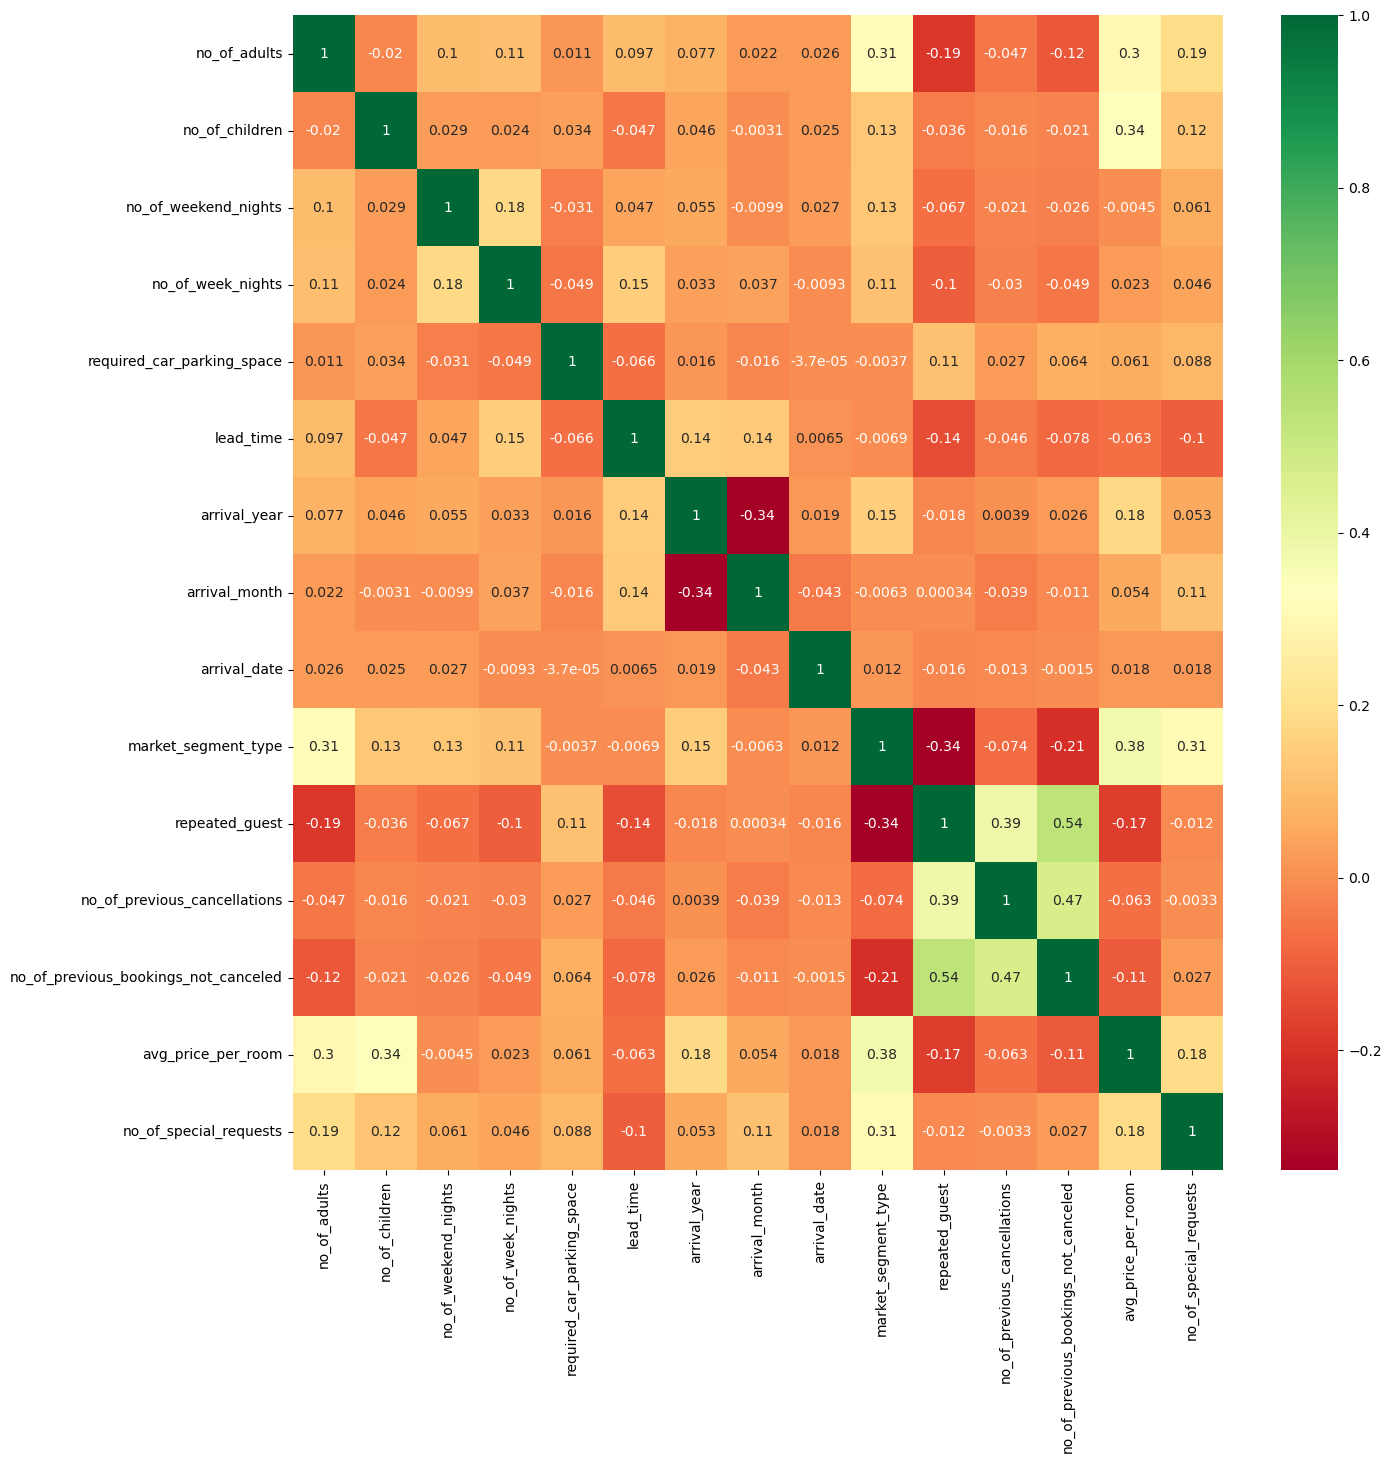

In [292]:
# Correlation among the variables
corrmat = df.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [293]:
feature_name = list(X.columns)
feature_name

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**Chi-square**

In [294]:
def chi_squared_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    return chi_support, chi_feature

In [295]:
chi_support, chi_feature = chi_squared_selector(X, y_encoded, num_feats)
chi_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**RFE**

In [296]:
def rfe_selector(X, y, num_feats):
    X_train = MinMaxScaler().fit_transform(X)
    lr = LogisticRegression(solver='lbfgs')
    rfe_lr = RFE(estimator=lr, 
             n_features_to_select=5,
             step=1,
             verbose=5)
    rfe_lr = rfe_lr.fit(X_train, y)
    rfe_lr_support = rfe_lr.get_support()
    rfe_lr_feature = X.loc[:, rfe_lr_support].columns.tolist()
    return rfe_lr_support, rfe_lr_feature

In [297]:
rfe_lr_support, rfe_lr_feature = rfe_selector(X, y_encoded, num_feats)
rfe_lr_feature

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


['required_car_parking_space',
 'lead_time',
 'market_segment_type',
 'avg_price_per_room',
 'no_of_special_requests']

**Logistic Regression (Lasso)**

In [298]:
def embedded_log_reg_selector(X, y, num_feats):
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=50000), max_features=num_feats)
    embedded_lr_selector = embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    return embedded_lr_support, embedded_lr_feature

In [299]:
embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y_encoded, num_feats)
embedded_lr_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based Randonm Forest**

In [300]:
def embedded_rf_selector(X, y, num_feats):
    rf = RandomForestClassifier(n_estimators=100)
    embedded_rf_selector = SelectFromModel(rf, 
                           max_features=num_feats)
    embedded_rf_selector = embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

In [301]:
embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y_encoded, num_feats)
embedded_rf_feature

['lead_time',
 'arrival_month',
 'arrival_date',
 'avg_price_per_room',
 'no_of_special_requests']

**Tree based LightGBM**

In [302]:
def embedded_lgbm_selector(X, y, num_feats):
    lgbmc = LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           num_leaves=32,
                           colsample_bytree=0.2,
                           reg_alpha=3,
                           reg_lambda=1,
                           min_split_gain=0.01,
                           min_child_weight=40)
    embedded_lgbm_selector = SelectFromModel(lgbmc, 
                                             max_features=num_feats)
    embedded_lgbm_selector = embedded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    
    return embedded_lgbm_support, embedded_lgbm_feature

In [303]:
embedded_lgbm_selector(X, y_encoded, num_feats)

(array([False, False, False,  True, False,  True, False,  True,  True,
        False, False, False, False,  True, False]),
 ['no_of_week_nights',
  'lead_time',
  'arrival_month',
  'arrival_date',
  'avg_price_per_room'])

In [304]:
def autoFeatureSelector(dataset_path, methods=[]):
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y_encoded,num_feats)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y_encoded,num_feats)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y_encoded, num_feats)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y_encoded, num_feats)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y_encoded, num_feats)
    
    
    pd.set_option('display.max_rows', None)

    
    feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})

    feature_selection_df['Total'] = feature_selection_df.sum(axis=1)
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    feature_selection_df.head(num_feats)

    return feature_selection_df

In [305]:
best_features = autoFeatureSelector(dataset_path="Hotel_Reservations.csv", methods=['chi-square', 'rfe', 'log-reg', 'rf', 'lgbm'])
best_features.head(20)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


E:\temp\ipykernel_10532\863943312.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_selection_df['Total'] = feature_selection_df.sum(axis=1)


,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,lead_time,True,True,True,True,True,5
2,avg_price_per_room,True,True,True,True,True,5
3,no_of_special_requests,True,True,True,True,False,4
4,arrival_month,True,False,True,True,True,4
5,arrival_date,True,False,True,True,True,4
6,required_car_parking_space,True,True,True,False,False,3
7,no_of_week_nights,True,False,True,False,True,3
8,market_segment_type,True,True,True,False,False,3
9,repeated_guest,True,False,True,False,False,2
10,no_of_weekend_nights,True,False,True,False,False,2


### Dropping the  least important features based on ranking of feature selector

In [306]:
X = df.drop(['booking_status','no_of_children',
            'no_of_adults','arrival_year'], axis=1)
y = df['booking_status']
num_feats = df.shape[1]-1

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

---
### Fitting the model

In [308]:
SGD_model.fit(X_train, y_train)

SGDClassifier()

In [309]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # 

In [310]:
SGD_model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
SGD_predictions = SGD_model.predict(X_test)

In [311]:
confusion_matrix(y_test, SGD_predictions)

array([[2961,  561],
       [2294, 5067]], dtype=int64)

In [312]:
accuracy_score(y_test, SGD_predictions)

0.7376642469907194

In [313]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8028

In [314]:
#recall_score(y_test, SGD_predictions)

In [315]:
#precision_score(y_test, SGD_predictions)

In [316]:
#f1_score(y_test, SGD_predictions)

---
# Random Forest Regression

### Splitting the dataset into the Training set and Test set

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
X__rf=X 

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X__rf, y_encoded, test_size = 0.2, random_state = 1)

### Training the Random Forest Regression model on the whole dataset

In [320]:
RF_clf = RandomForestClassifier()

In [321]:
RF_clf.fit(X_train, y_train)

RandomForestClassifier()

In [322]:
pred = RF_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9029634734665748

In [323]:
n_nodes = []
max_depths = []

for ind_tree in RF_clf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 7145
Average maximum depth 32


## Assessing Random Forest Performance

In [324]:
RF_train_predictions = RF_clf.predict(X_train)
train_rf_probs = RF_clf.predict_proba(X_train)[:, 1]

RF_predictions = RF_clf.predict(X_test)
rf_probs = RF_clf.predict_proba(X_test)[:, 1]


### Helper function to evaluate model

In [338]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

def evaluate_RF_clf(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [348]:
from collections import Counter

### Confusion Matrix

In [349]:
from sklearn.metrics import confusion_matrix
import itertools

#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [350]:
accuracy_score(y_test, RF_predictions)

0.9029634734665748

Confusion matrix, without normalization
[[1906  442]
 [ 262 4645]]


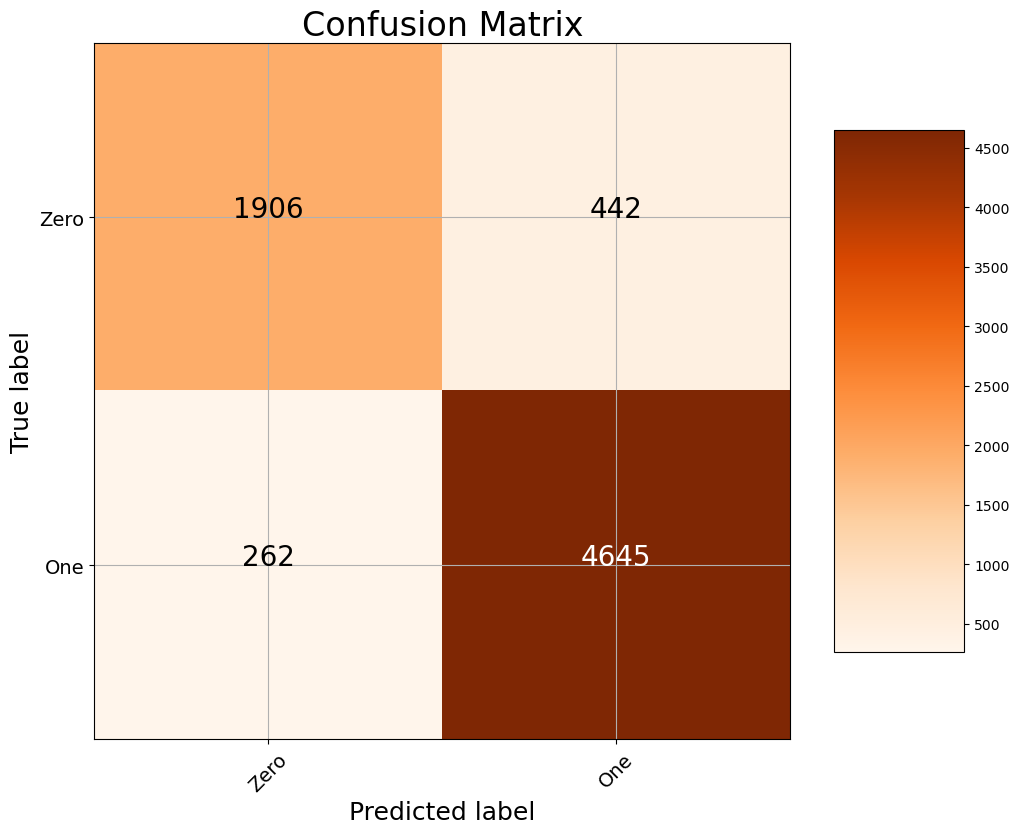

In [351]:
cm=confusion_matrix(y_test,RF_predictions)
plot_confusion_matrix(cm, classes = ['Zero', 'One'],
                      title = 'Confusion Matrix')


### GridSearchCV for Random Forest

In [362]:
pm_grid = {'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]}

In [354]:
from sklearn.model_selection import GridSearchCV

RF_Grid = GridSearchCV(estimator=RF_clf,          
                       param_grid=pm_grid,
                       cv=5,                   #108 forests trains for 5 times
)

In [ ]:
RF_Grid.fit(X_train,y_train)

In [356]:
RF_Grid.best_params_  # Parameter setting that gave the best results

{'max_depth': None,
 'max_features': None,
 'max_samples': 10,
 'n_estimators': 120}

In [357]:
RF_Grid.best_estimator_  # estimator which gave highest score

RandomForestClassifier(max_features=None, max_samples=10, n_estimators=120)

In [360]:
from matplotlib import pyplot as plt
grid_predictions = RF_Grid.predict(X_test)

Confusion matrix, without normalization
[[1040 1308]
 [ 314 4593]]


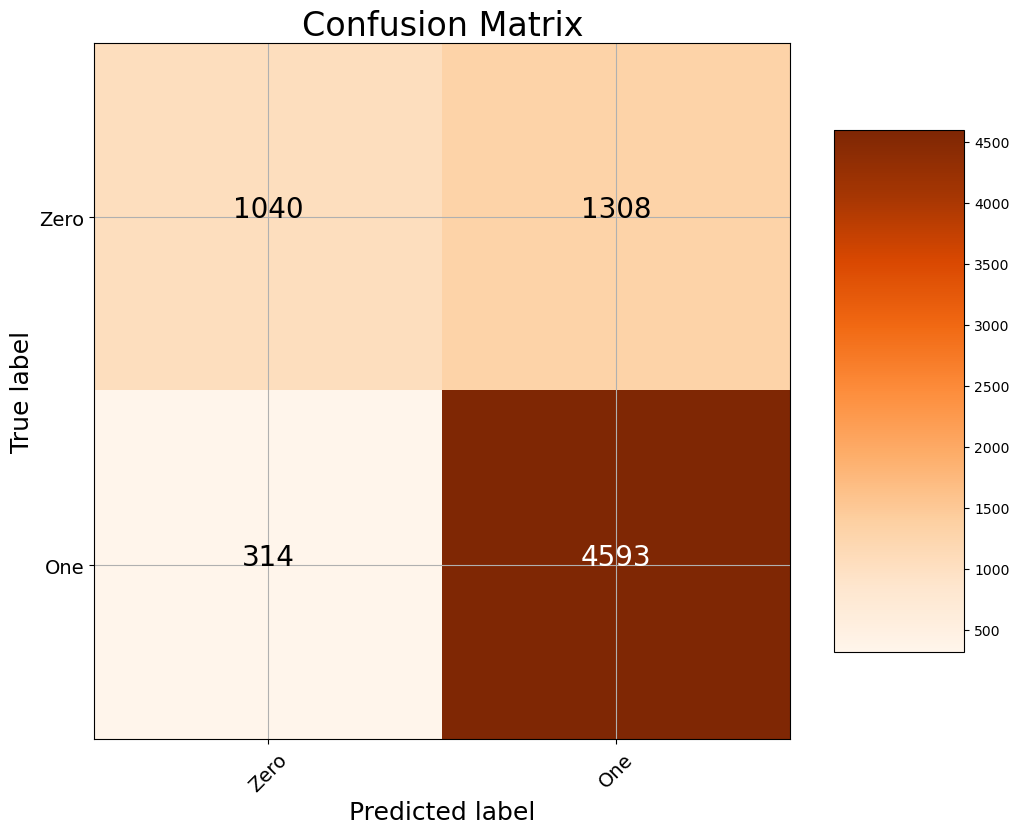

In [361]:
cm2 = confusion_matrix(y_test,grid_predictions)
cm2
plot_confusion_matrix(cm2, classes = ['Zero', 'One'], title = 'Confusion Matrix')

---

# Decision Tree Algorithm

In [ ]:
#add a new column called  "booking status updated" with 0 and 1 values. Not_cancelled is 1 and cancelled is 0
df['Booking_Status_Updated']=y_encoded

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Booking_Status_Updated
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,0


In [ ]:
#checking the number of columns in the dataframe df
df.columns.size

20

In [ ]:
# perform one hot encoding on the following columns:
#type_of_meal_plan, room_type_reserved, market_segment_type
#this is done as decision tree algorithm does not support categorical data as features
df_new = pd.get_dummies(df, columns = ['type_of_meal_plan','room_type_reserved','market_segment_type'])
df_new.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Booking_Status_Updated', 'type_of_meal_plan_Meal Plan 1',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],


In [ ]:
df_new = df_new.drop(columns=['type_of_meal_plan_Meal Plan 1','room_type_reserved_Room_Type 1','market_segment_type_Aviation'],axis=1)

In [ ]:
df_new.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Booking_Status_Updated', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [ ]:
X = df_new.drop(columns=['Booking_ID','booking_status','Booking_Status_Updated'],axis=1)
y = df_new['Booking_Status_Updated']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2877,  645],
       [ 754, 6607]], dtype=int64)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8709914545621612


In [ ]:
recallScore = recall_score(y_test, y_pred)
print("The recall score is ", recallScore)

precisionScore = precision_score(y_test, y_pred)
print("The precision score is ", precisionScore)

The recall score is  0.8975682651813612
The precision score is  0.9110590182018753


In [ ]:
#Check the accuracy with hyperparameter tunign
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8337774510704768


In [ ]:
#Check the accuracy with hyperparameter tunign
clf = DecisionTreeClassifier(criterion="gini", 
                            max_depth=5,
                            splitter="best")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8354314067812184


# Grid Search CV - Decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

param_dict = {
"criterion":["gini","entropy"], "max_depth" :[1,2,3,4,5,6,None]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, param_grid = param_dict, cv = 10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_estimator_

grid.best_score_
#hyperparameter tuning.
grid.best_params_
print("The best score is : ", grid.best_score_)
print("The best estimator is : ",grid.best_estimator_)

The best score is :  0.8643665588473359
The best estimator is :  DecisionTreeClassifier(criterion='entropy')


### Our best parameters are Criterion as entropy and max_depth as None

In [ ]:
# checking the accuracy with the best hyper parameters
clf = DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8727372967012772


In [ ]:
recallScore = recall_score(y_test, y_pred)
print("The recall score is ", recallScore)

precisionScore = precision_score(y_test, y_pred)
print("The precision score is ", precisionScore)

The recall score is  0.899062627360413
The precision score is  0.9115702479338843


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2880,  642],
       [ 743, 6618]], dtype=int64)

In [ ]:
#checking the accuracy with other hyper parameters to compare the accuracy score
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Checking again")

clf = DecisionTreeClassifier(criterion="log_loss", max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8354314067812184
Checking again
Accuracy: 0.8376366810622071


### <span style="color: green;">It can be seen that a higher accuracy is reached with using the hyperparameters suggested from Grid Search CV</span>

# Feature selection for decision tree

In [ ]:
X = df_new.drop(['Booking_ID','booking_status','Booking_Status_Updated'],axis=1)

In [ ]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [ ]:
y = df['Booking_Status_Updated']

In [ ]:
num_feats = df.shape[1]-1

In [ ]:
#create a list of the feature names
feature_name = X.columns.tolist()
feature_name

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [ ]:
#call chi squre function
chi_support, chi_feature = chi_squared_selector(X, y, num_feats)
chi_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [ ]:
#call rfe selector
rfe_lr_support, rfe_lr_feature = rfe_selector(X, y, num_feats)
rfe_lr_feature

Fitting estimator with 27 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 26 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 25 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 24 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 23 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 22 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 21 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 20 features.
Fitting estimator with 19 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 18 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 17 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 16 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


['lead_time',
 'repeated_guest',
 'avg_price_per_room',
 'no_of_special_requests',
 'market_segment_type_Complementary']

In [ ]:
#call logistic regression function
embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
embedded_lr_feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'required_car_parking_space',
 'arrival_month',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [ ]:
#call random forest fucntion
embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
embedded_rf_feature

['no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
#call embedded lgbm function
embedded_lgbm_selector(X, y, num_feats)

(array([False, False, False,  True, False,  True, False,  True,  True,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 ['no_of_week_nights',
  'lead_time',
  'arrival_month',
  'arrival_date',
  'avg_price_per_room'])

In [ ]:
#call auto selector functin
best_features = autoFeatureSelector(dataset_path="Hotel_Reservations.csv", methods=['chi-square', 'rfe', 'log-reg', 'rf', 'lgbm'])
best_features.head(10)

Fitting estimator with 27 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 26 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 25 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 24 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 23 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 22 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 21 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 20 features.
Fitting estimator with 19 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 18 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 17 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 16 features.


C:\Users\aanan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


C:\Users\aanan\AppData\Local\Temp\ipykernel_33560\3123419553.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_selection_df['Total'] = feature_selection_df.sum(axis=1)


,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,no_of_special_requests,True,True,True,True,False,4
2,lead_time,True,True,False,True,True,4
3,avg_price_per_room,True,True,False,True,True,4
4,repeated_guest,True,True,True,False,False,3
5,no_of_week_nights,True,False,False,True,True,3
6,market_segment_type_Complementary,True,True,True,False,False,3
7,arrival_month,False,False,True,True,True,3
8,room_type_reserved_Room_Type 7,True,False,True,False,False,2
9,room_type_reserved_Room_Type 6,True,False,True,False,False,2
10,required_car_parking_space,True,False,True,False,False,2


##### Best Features from feature selector are no_of_weekend_nights, no_of_special_requests , lead_time, avg_price_per_room, no_of_week_nights, market_segment_type_Online, market_segment_type_Complementary, arrival_month

In [ ]:
# Finding the accuracy with various feature selection
X = df_new[['lead_time','avg_price_per_room','no_of_special_requests','market_segment_type_Complementary','market_segment_type_Online']]
y = df_new[['Booking_Status_Updated']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 ... 0 0 0]


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8477441881834054


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2765,  757],
       [ 900, 6461]], dtype=int64)

In [ ]:
# features = np.array([[100, 10.15, 1, 0,0]])
# # using inputs to predict the output
# prediction = clf.predict(features)
# print("Prediction: {}".format(prediction))

In [ ]:
X = df_new[['no_of_weekend_nights','no_of_special_requests', 'lead_time' , 'avg_price_per_room', 'no_of_week_nights', 'market_segment_type_Online', 'market_segment_type_Complementary', 'arrival_month']]
y = df_new[['Booking_Status_Updated']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 1 0 ... 1 0 0]
Accuracy: 0.8631811081503262


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2824,  698],
       [ 791, 6570]], dtype=int64)

In [ ]:
from sklearn.metrics import recall_score
recallScore = recall_score(y_test, y_pred)
print("The recall score is ", recallScore)

The recall score is  0.8925417742154599


In [ ]:
from sklearn.metrics import precision_score
precisionScore = precision_score(y_test, y_pred)
print("The precision score is ", precisionScore)

The precision score is  0.9039625756741883


In [ ]:
# features = np.array([[0, 0, 0, 0,0,0,0,0]])
# # using inputs to predict the output
# prediction = clf.predict(features)
# print("Prediction: {}".format(prediction))